Nesse notebook vou mostrar que os autovetores da laplaciana (e laplaciana normalizada) de fato capturam informações sobre que pontos pertence a que grupos.

In [1]:
import numpy as np
import seaborn as sns
import scipy
import scipy.sparse.csgraph
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [9]:
n = 1000
k = 4
gammaAffinity = 0.03
normalizeLaplacian = False
disconnectGraph = False

In [10]:
# generating data
A = np.random.normal(0, 0.5, n // 4)
B = np.random.normal(5, 0.5, n // 4)
C = np.random.normal(15, 0.5, n // 4)
D = np.random.normal(20, 0.5, n // 4)
x = np.concatenate([A, B, C, D])

[Text(0,0.5,'Density'), Text(0.5,0,'x')]

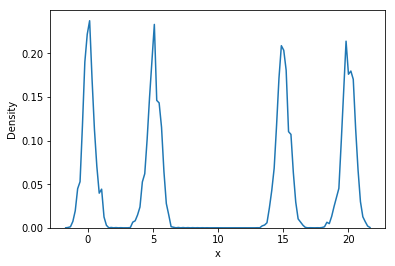

In [11]:
fig = sns.kdeplot(x, bw = 0.1)
fig.set(xlabel = 'x', ylabel = 'Density')

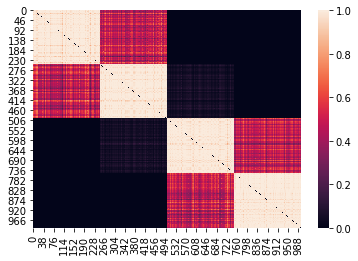

In [12]:
# computing affinity matrix
# w(x, y) = exp(-1 * l2(x, y) * l2(x, y))
vdist = scipy.spatial.distance.pdist(x.reshape((-1, 1)), 'euclidean')
dist = scipy.spatial.distance.squareform(vdist)
A = np.exp(-gammaAffinity * np.square(dist))

# the correspondent graph does not have self loops. Removing diagonal
for i in range(n):
    A[i, i] = 0

if disconnectGraph:
    A[0:n//2, n//2:] = 0
    A[n//2:, 0:n//2] = 0
    
# matriz de similaridades
fig = sns.heatmap(A)

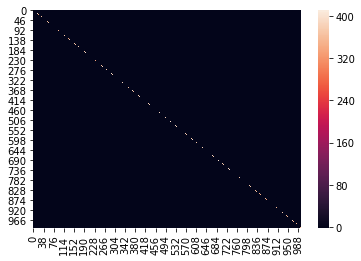

In [13]:
# computing the laplacian!
#L = delta - A

L = scipy.sparse.csgraph.laplacian(A, normed = normalizeLaplacian)
fig = sns.heatmap(L)

#print np.sum(L, axis = 1)

In [14]:
# computing eigenvalues of the (normalized) Laplacian
w, U = np.linalg.eigh(L)

# considering just firt k eigenvalues of L
U = U[:, :k]

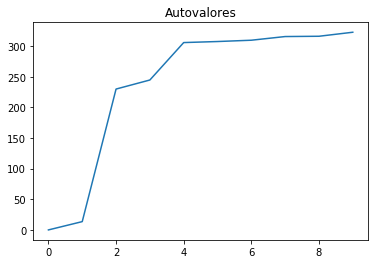

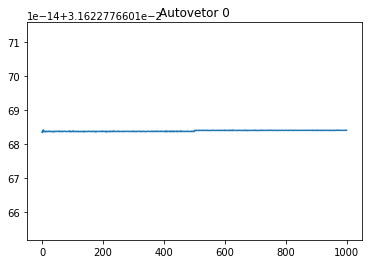

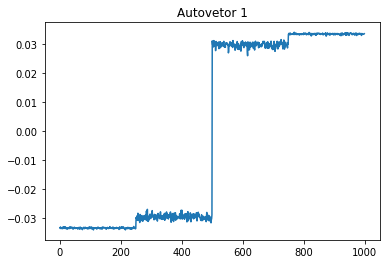

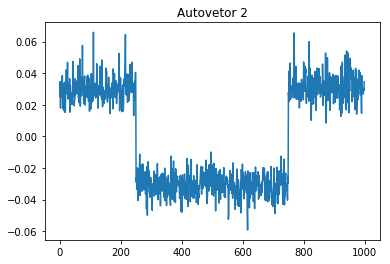

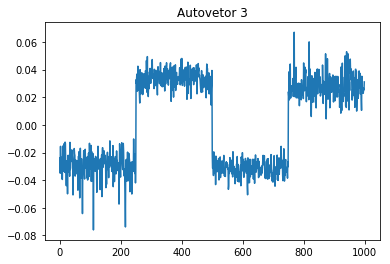

In [15]:
def plotArray(a, title = None):
    n = len(a)
    fig = plt.figure()
    if title is not None:
        plt.title(title)
    plt.plot(range(n), a, ls = '-')

plotArray(w[:10], 'Autovalores')    
    
plotArray(U[:, 0], 'Autovetor 0')
plotArray(U[:, 1], 'Autovetor 1')
plotArray(U[:, 2], 'Autovetor 2')
plotArray(U[:, 3], 'Autovetor 3')
